📂 Upload your CSV file:


Saving MultipleLR.csv - MultipleLR.csv (1).csv to MultipleLR.csv - MultipleLR.csv (1).csv

Loaded dataset 'MultipleLR.csv - MultipleLR.csv (1).csv' with shape (24, 4)


,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101


Epoch 1/200 - MSE: 9831.447740
Epoch 21/200 - MSE: 6.361927
Epoch 41/200 - MSE: 6.022198
Epoch 61/200 - MSE: 6.004587
Epoch 81/200 - MSE: 5.965113
Epoch 101/200 - MSE: 6.013607
Epoch 121/200 - MSE: 5.970081
Epoch 141/200 - MSE: 5.964653
Epoch 161/200 - MSE: 6.069781
Epoch 181/200 - MSE: 6.066323
Epoch 200/200 - MSE: 6.050057

✅ Training complete.
Final MSE: 6.050057
R² score: 0.989455
Intercept: 162.442454
Coefficients: [ 4.09271297  6.84232574 13.52288053]


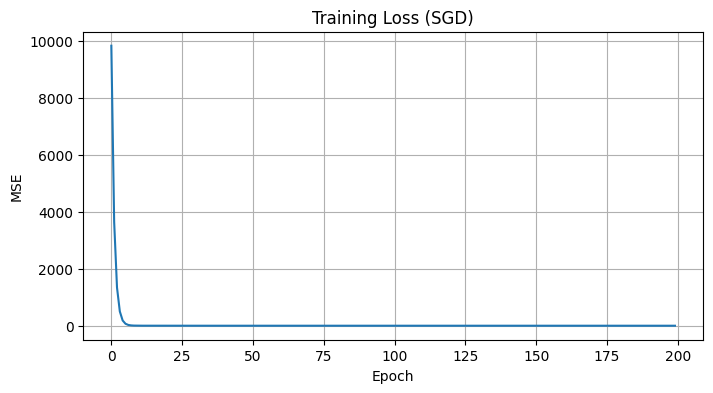

,Actual,Predicted
0,185.0,184.726247
1,180.0,181.556722
2,196.0,199.302919
3,142.0,139.374542
4,101.0,104.373405
5,149.0,150.511336
6,115.0,113.620553
7,175.0,174.319692
8,164.0,164.400036
9,141.0,143.694322


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# --- Step 1: Upload dataset ---
print("📂 Upload your CSV file:")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(f"\nLoaded dataset '{filename}' with shape {df.shape}")
display(df.head())

# --- Step 2: Choose target column ---
target_col = df.columns[-1]   # assume last column is target
X = df.drop(columns=[target_col]).values.astype(float)
y = df[target_col].values.astype(float).reshape(-1, 1)

# --- Step 3: Normalize features ---
X_mean = X.mean(axis=0, keepdims=True)
X_std = X.std(axis=0, keepdims=True)
X_std[X_std == 0] = 1.0  # prevent divide by zero
X_scaled = (X - X_mean) / X_std

# --- Step 4: Define Linear Regression using SGD ---
class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=200, batch_size=1, shuffle=True, random_state=42):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.random_state = random_state
        self.loss_history = []

    def fit(self, X, y, verbose=True):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        self.coef_ = np.zeros((n_features, 1))
        self.intercept_ = 0.0

        indices = np.arange(n_samples)

        for epoch in range(self.epochs):
            if self.shuffle:
                np.random.shuffle(indices)

            for start in range(0, n_samples, self.batch_size):
                batch_idx = indices[start:start+self.batch_size]
                Xb = X[batch_idx]
                yb = y[batch_idx]

                preds = Xb @ self.coef_ + self.intercept_
                error = preds - yb

                grad_w = (2 / len(Xb)) * (Xb.T @ error)
                grad_b = (2 / len(Xb)) * np.sum(error)

                self.coef_ -= self.lr * grad_w
                self.intercept_ -= self.lr * grad_b

            # compute MSE for monitoring
            loss = np.mean((X @ self.coef_ + self.intercept_ - y) ** 2)
            self.loss_history.append(loss)

            if verbose and (epoch % max(1, self.epochs // 10) == 0 or epoch == self.epochs - 1):
                print(f"Epoch {epoch+1}/{self.epochs} - MSE: {loss:.6f}")

        return self

    def predict(self, X):
        return X @ self.coef_ + self.intercept_

# --- Step 5: Train model ---
model = LinearRegressionSGD(lr=0.01, epochs=200)
model.fit(X_scaled, y)

# --- Step 6: Evaluate model ---
y_pred = model.predict(X_scaled)
mse = np.mean((y_pred - y) ** 2)
r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

print("\n✅ Training complete.")
print(f"Final MSE: {mse:.6f}")
print(f"R² score: {r2:.6f}")
print(f"Intercept: {float(model.intercept_):.6f}")
print("Coefficients:", model.coef_.ravel())

# --- Step 7: Plot loss ---
plt.figure(figsize=(8,4))
plt.plot(model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Training Loss (SGD)")
plt.grid(True)
plt.show()

# --- Step 8: Compare first few predictions ---
compare_df = pd.DataFrame({
    "Actual": y.ravel(),
    "Predicted": y_pred.ravel()
})
display(compare_df.head(10))
